1.) Import calculated geometrical features

In [6]:
workdir<-'/home/komazsofi/Munka/Heidelberg/DAAD_helios_sim/Run2_wground_20161228/'
filename<-'Sim_obj_geom_fea.txt'

features=c('filename','platform','treemodellid','shape','scanposition',
           'h10','h20','h30','h40','h50','h60','h70','h80','h90','h100',
           'h10_tot','h20_tot','h30_tot','h40_tot','h50_tot','h60_tot','h70_tot','h80_tot','h90_tot','h100_tot',
           'h10_f_tot','h20_f_tot','h30_f_tot','h40_f_tot','h50_f_tot','h60_f_tot','h70_f_tot','h80_f_tot','h90_f_tot','h100_f_tot',
           'h10_s_tot','h20_s_tot','h30_s_tot','h40_s_tot','h50_s_tot','h60_s_tot','h70_s_tot','h80_s_tot','h90_s_tot','h100_s_tot',
           'h10_m_tot','h20_m_tot','h30_m_tot','h40_m_tot','h50_m_tot','h60_m_tot','h70_m_tot','h80_m_tot','h90_m_tot','h100_m_tot',
           'a_mean_z','a_median_z','a_var_z','a_std_z','a_coeffvar_z','a_skew_z','a_kurto_z','max_z',
           'a_mean_f','a_median_f','a_var_f','a_std_f','a_coeffvar_f','a_skew_f','a_kurto_f','max_f',
           'nofp_single_to_all','nofp_first_to_all','nofp_multi_to_all','nofp_up25_single_to_all','nofp_up50_single_to_all','nofp_up75_single_to_all','nofp_up25_first_to_all','nofp_up50_first_to_all','nofp_up75_first_to_all','nofp_up25_multi_to_all','nofp_up50_multi_to_all','nofp_up75_multi_to_all',
           'c_length','c_width','ratio_length_width')

sim_data = read.csv(paste(workdir,filename,sep=''),head=FALSE,
                    col.names = c('filename','platform','treemodellid','shape','scanposition',
                                 'h10','h20','h30','h40','h50','h60','h70','h80','h90','h100',
                                 'h10_tot','h20_tot','h30_tot','h40_tot','h50_tot','h60_tot','h70_tot','h80_tot','h90_tot','h100_tot',
                                 'h10_f_tot','h20_f_tot','h30_f_tot','h40_f_tot','h50_f_tot','h60_f_tot','h70_f_tot','h80_f_tot','h90_f_tot','h100_f_tot',
                                 'h10_s_tot','h20_s_tot','h30_s_tot','h40_s_tot','h50_s_tot','h60_s_tot','h70_s_tot','h80_s_tot','h90_s_tot','h100_s_tot',
                                 'h10_m_tot','h20_m_tot','h30_m_tot','h40_m_tot','h50_m_tot','h60_m_tot','h70_m_tot','h80_m_tot','h90_m_tot','h100_m_tot',
                                 'a_mean_z','a_median_z','a_var_z','a_std_z','a_coeffvar_z','a_skew_z','a_kurto_z','max_z',
                                 'a_mean_f','a_median_f','a_var_f','a_std_f','a_coeffvar_f','a_skew_f','a_kurto_f','max_f',
                                 'nofp_single_to_all','nofp_first_to_all','nofp_multi_to_all','nofp_up25_single_to_all','nofp_up50_single_to_all','nofp_up75_single_to_all','nofp_up25_first_to_all','nofp_up50_first_to_all','nofp_up75_first_to_all','nofp_up25_multi_to_all','nofp_up50_multi_to_all','nofp_up75_multi_to_all',
                                 'c_length','c_width','ratio_length_width'))

filt_sim_data=sim_data[sim_data$scanposition == 0, ]

platform_grp_names=names(table(filt_sim_data$platform))
shape_grp_names=names(table(filt_sim_data$shape))
most_corralted_features=filt_sim_data[c('a_mean_z','a_median_z','a_kurto_z','ratio_length_width')]

2.) Usage of CCDA in order to examine the homogenous goups


Number of optimal groups: 1

Maximal difference between q95 and ratio 0

further investigation of the following  1 sub-groups  recommended:    [,1]         
ALS "sub-group 1"
MLS "sub-group 1"
TLS "sub-group 1"
ULS "sub-group 1"



Call:
hclust(d = dist(scale(mean_mtx)) * dist(scale(mean_mtx)), method = mth)

Cluster method   : ward.D 
Distance         : euclidean 
Number of objects: 4 


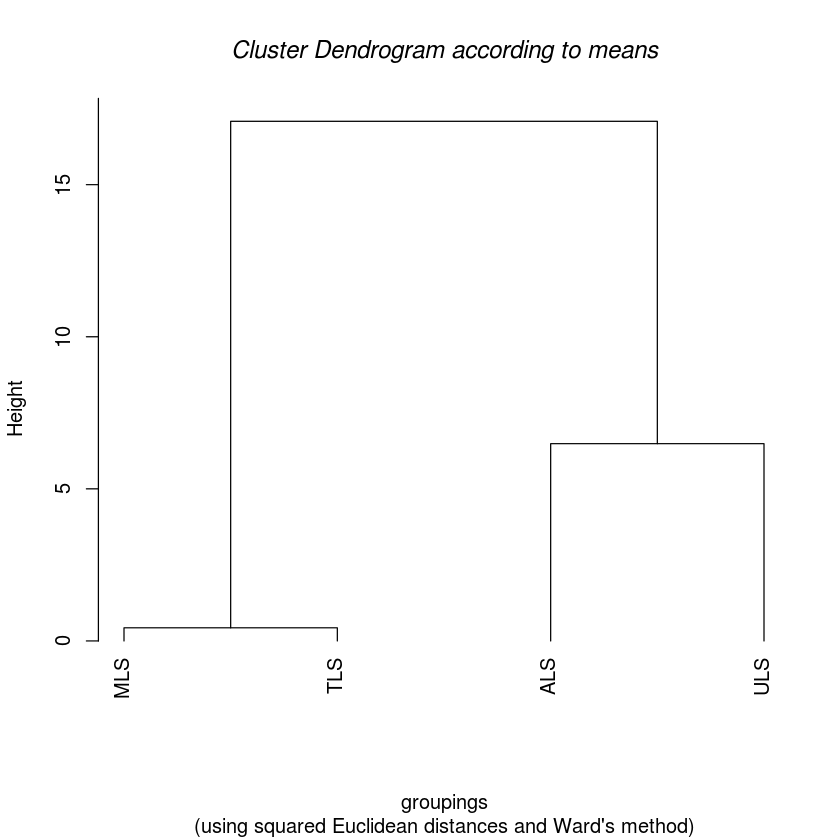

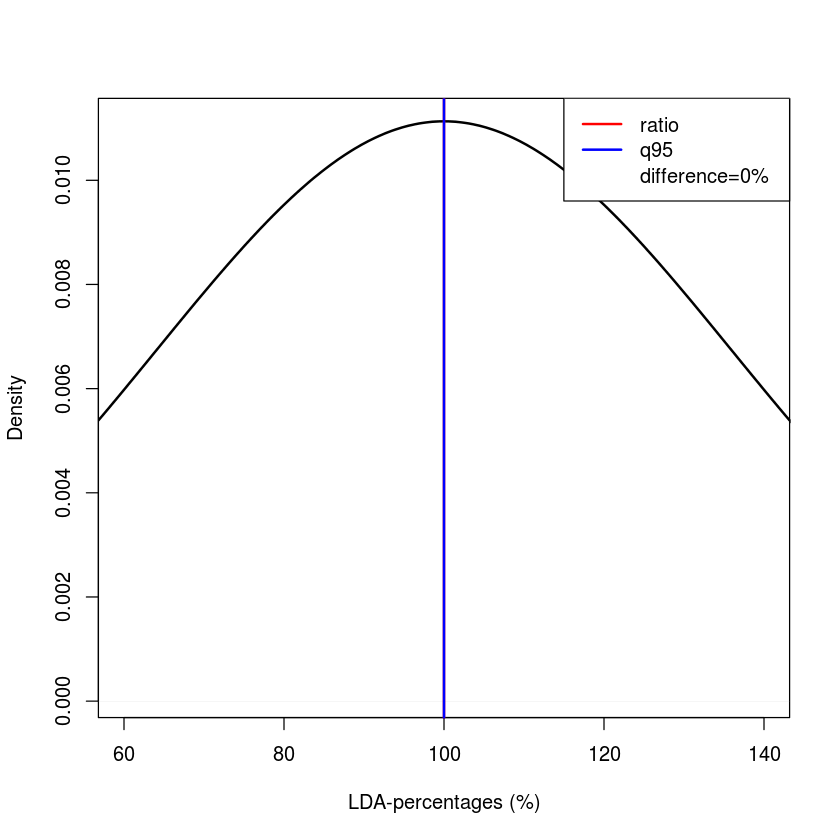

[1] 1

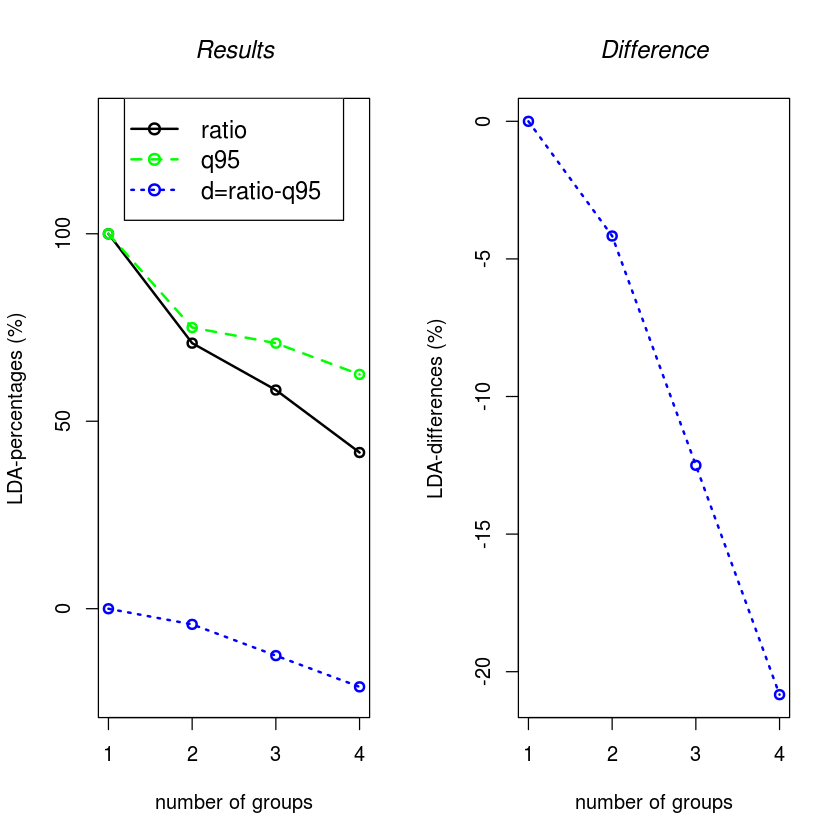

In [7]:
library('MASS')
library('ccda')

result<-ccda.main(most_corralted_features, filt_sim_data[,2],  100, platform_grp_names,"proportions",return.RCDP=TRUE)
plotccda.cluster(result)
plotccda.q95(result)
plotccda.results(result)
1

In [ ]:
CCDA_output <- data.frame(platformlist=result$nameslist,sub_groups=result$sub_groups[,1])
CCDANextRound <- merge(filt_sim_data,CCDA_output,by.x='platform',by.y='platformlist')

subgroup=CCDANextRound[,"sub_groups"]
subgroup1_id=which(subgroup =='sub-group 2')

sel_CCDANextRound1=CCDANextRound[subgroup1_id,]

result_nextround<-ccda.main(filt_sim_data[subgroup1_id,56:63], sel_CCDANextRound1[,1],  100, c('TLS','MLS'),"proportions",return.RCDP=TRUE)
#plotccda.cluster(result_nextround)
#plotccda.q95(result_nextround)
plotccda.results(result_nextround)


Number of optimal groups: 3

Maximal difference between q95 and ratio 0.333

further investigation of the following  3 sub-groups  recommended:             [,1]         
conical      "sub-group 1"
cylinderical "sub-group 2"
spherical    "sub-group 3"



Call:
hclust(d = dist(scale(mean_mtx)) * dist(scale(mean_mtx)), method = mth)

Cluster method   : ward.D 
Distance         : euclidean 
Number of objects: 3 


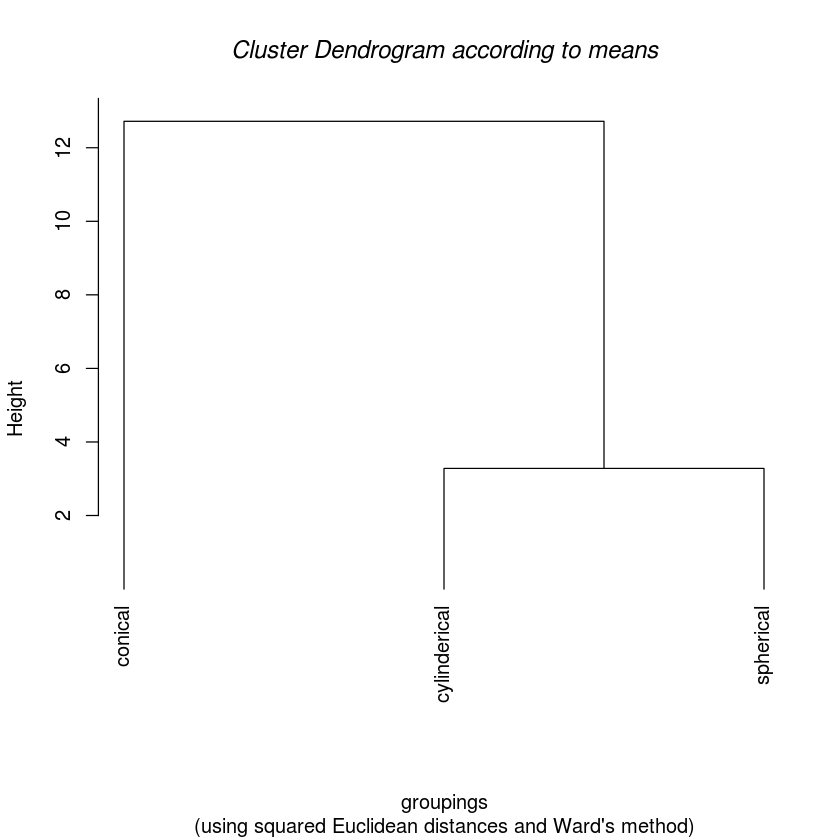

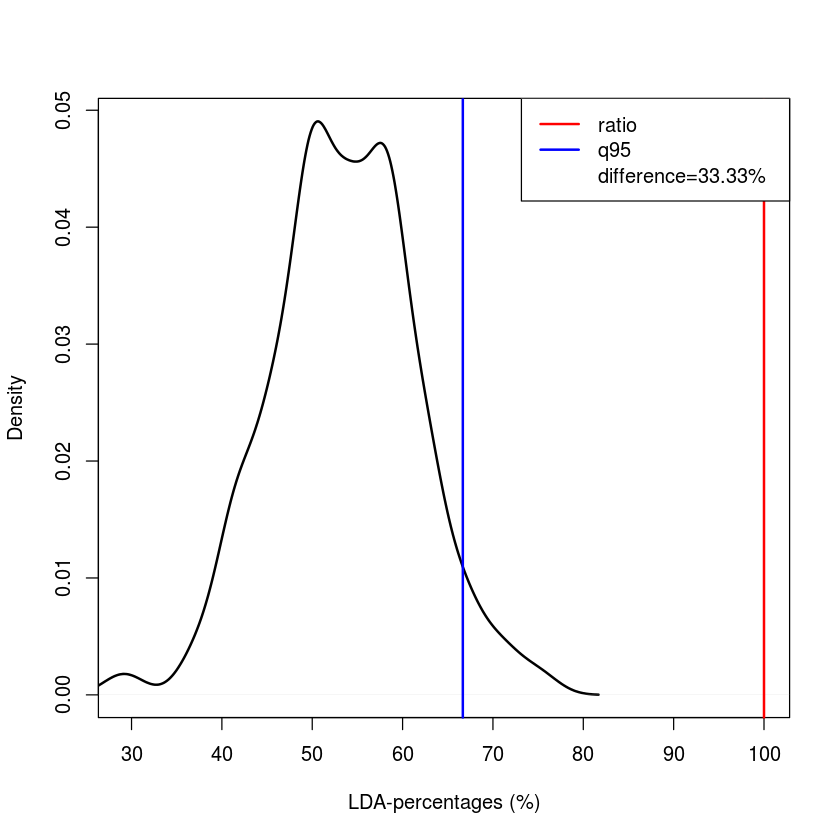

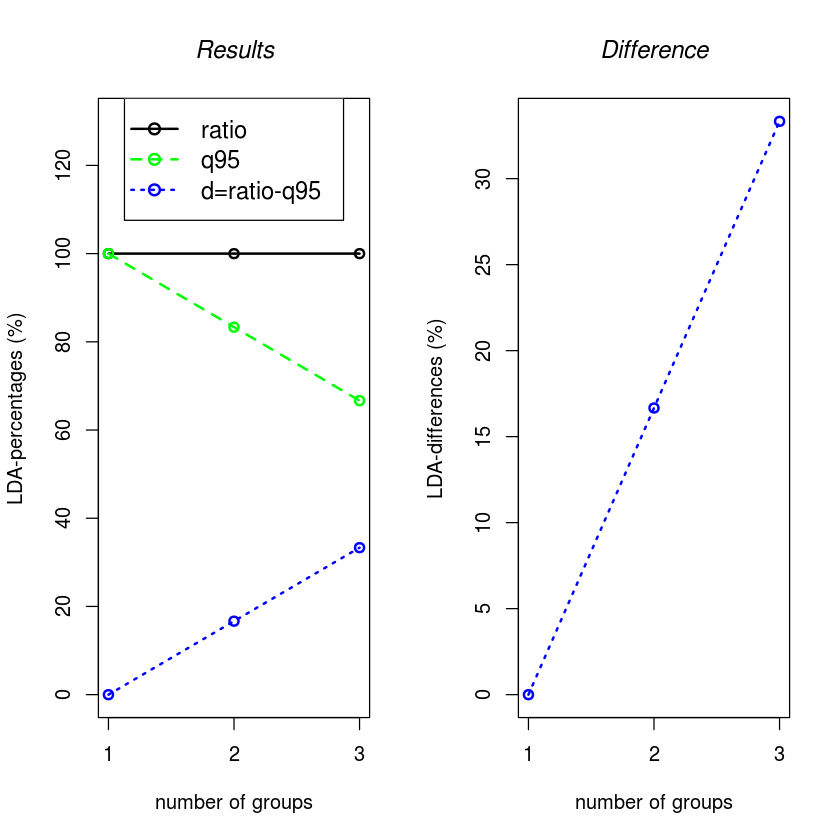

In [8]:
result2<-ccda.main(most_corralted_features, filt_sim_data[,4],  100, shape_grp_names,"proportions",return.RCDP=TRUE)
plotccda.cluster(result2)
plotccda.q95(result2)
plotccda.results(result2)